## How to handle outliers

# Z score method:

Z score is an important concept in statistics. Z score is also called standard score. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.

Z score = (x -mean) / std. deviation

A normal distribution is shown below and it is estimated that 68% of the data points lie between +/- 1 standard deviation. 95% of the data points lie between +/- 2 standard deviation 99.7% of the data points lie between +/- 3 standard deviation

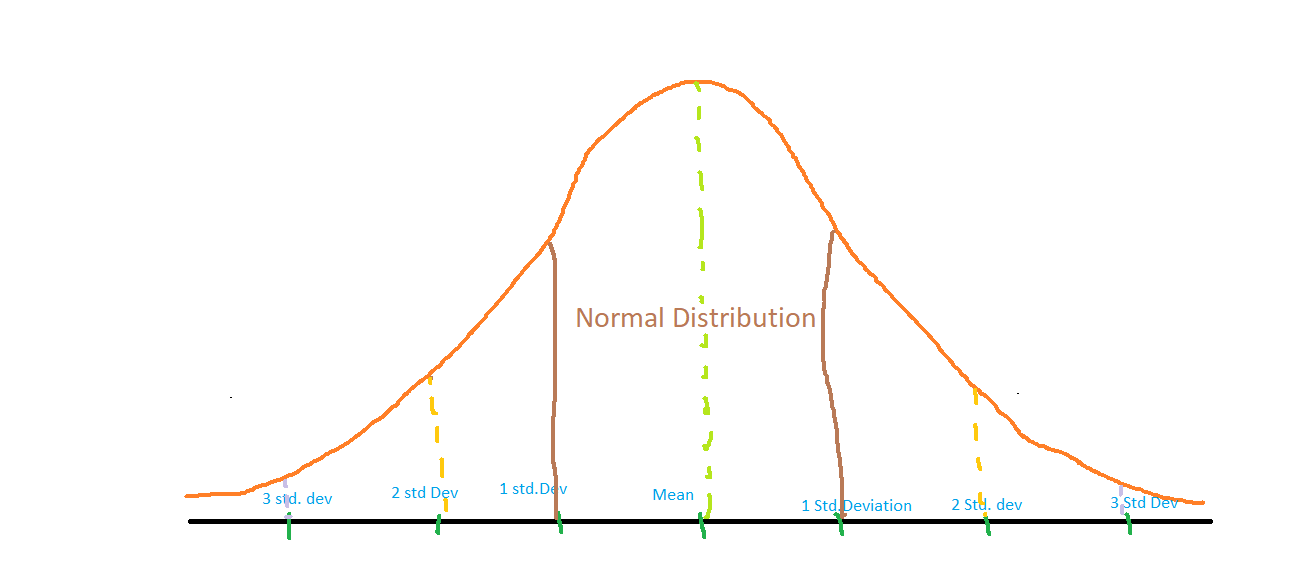

Z score and Outliers:

If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier. For example, in a survey, it was asked how many children a person had. Suppose the data obtained from people is

1, 2, 2, 2, 3, 1, 1, 15, 2, 2, 2, 3, 1, 1, 2

Clearly, 15 is an outlier in this dataset.

-------
**Things to do when performing this technique**:
1. Column distribution is normal or close to normal.
2. Find there upper and lower limit.
3. Then as per data outlier treatment you can do,
   - Trimming.(If the data has minimal outliers).
   - Capping.(If the data has to much outliers so triming is not best option so we can with capping).
4. If missing values in data first fill them.
--------

## Import libraries:

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset:

In [69]:
df=pd.read_csv('../Data/placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [70]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


**Firslty check column has no missing values**

In [71]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

c:\Users\Admin\miniconda3\envs\main\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cgpa', ylabel='Count'>

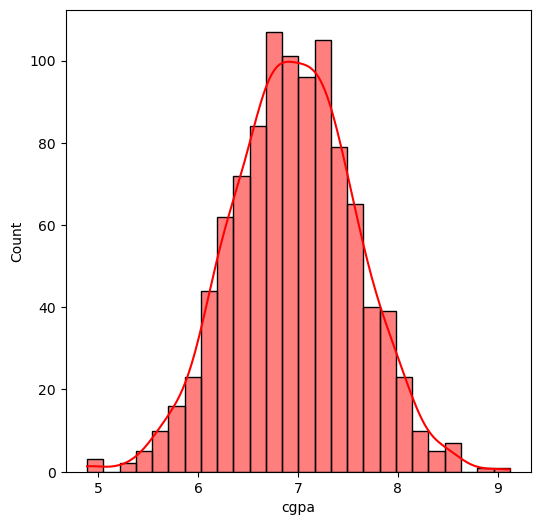

In [72]:
plt.figure(figsize=(6,6))
ax=plt.subplot(1,1,1)

sns.histplot(df['cgpa'],kde=True,color='Red')

**So that column is normal distributed we can wrok with this column by applying Z-score method.**

In [73]:
print('Mean value',df['cgpa'].mean())
print('Std value',df['cgpa'].std())
print('Min value',df['cgpa'].min())
print('Max value',df['cgpa'].max())

Mean value 6.96124
Std value 0.6158978751323894
Min value 4.89
Max value 9.12


**Now we find upper and lower limit,the values that are outrange (+3) & (-3) are outliers.**

In [74]:
print('Upper limit',df['cgpa'].mean() + 3 * df['cgpa'].std())
print('Lower limit',df['cgpa'].mean() - 3 * df['cgpa'].std())

Upper limit 8.808933625397168
Lower limit 5.113546374602832


**Now find the outlier that lies in outrange**

In [75]:
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


**So only 5 rows are detected to outliers its very few rows we can easily removes this rows that can't effect on our data**

**Trimming Data**

In [79]:
new_df=df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df.shape

(995, 3)